# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

### Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary. 


The business objective will be to identify features that can be used to predict user car prices. 
We will look at the dataset and determine which features have high correlation to price. The goal of the 
data analysis and modelling process will be to provide a framework to the dealears to be able 
to determine which car features are most sought after and predict prices of used cars to maximize dealer profitability.

### Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

We will run a few python commands to improve our understanding of the data.Let us first import the file and run basic commands to understand the dataset. We will import some packages to be able to do this and also for further proceessing later.

In [141]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import random
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, HuberRegressor, Ridge,Lasso
from sklearn.compose import make_column_transformer, make_column_selector, ColumnTransformer
from sklearn.preprocessing import PolynomialFeatures, OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV,StratifiedKFold
from sklearn.feature_selection import SequentialFeatureSelector, SelectFromModel, RFE
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [142]:
data = pd.read_csv('data/vehicles.csv')
data.info()
data.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-null  object 
dtypes: f

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
0,7222695916,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az
1,7218891961,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar
2,7221797935,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl
3,7222270760,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma
4,7210384030,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc


In [143]:
#print missing values per column
print(data.isna().sum())

id                   0
region               0
price                0
year              1205
manufacturer     17646
model             5277
condition       174104
cylinders       177678
fuel              3013
odometer          4400
title_status      8242
transmission      2556
VIN             161042
drive           130567
size            306361
type             92858
paint_color     130203
state                0
dtype: int64


In [144]:
#print number of unique values per column
print(data.nunique())

id              426880
region             404
price            15655
year               114
manufacturer        42
model            29649
condition            6
cylinders            8
fuel                 5
odometer        104870
title_status         6
transmission         3
VIN             118246
drive                3
size                 4
type                13
paint_color         12
state               51
dtype: int64


There seem to be a lot of missing values in the data. But also let us consider the columns. Some of the columns will not be useful like id and we can drop them. Also there are many unique values for model which might not be useful. So we will drop this column as well. Also, there are 426880 in the dataset but only 118246 unique values for VIN. Since VIN is a unique identifier for a car, we will look at this further.

In [145]:
# Group by 'VIN'

grouped = data.groupby('VIN')

# Get the list of unique group keys
group_keys = grouped.groups.keys()

# Pick a random group key
random_group_key = random.choice(list(group_keys))

# Get the specific group by the random key and print it
random_group_data = grouped.get_group(random_group_key)
print(f"Random group key: {random_group_key}")
print(random_group_data)

Random group key: JF2GTDNC0LH283507
                id  region  price    year manufacturer      model condition  \
363989  7316016233  austin  39500  2020.0       subaru  crosstrek       NaN   
364668  7314641528  austin  39500  2020.0       subaru  crosstrek       NaN   
365549  7312668969  austin  39500  2020.0       subaru  crosstrek       NaN   

       cylinders   fuel  odometer title_status transmission  \
363989       NaN  other      29.0        clean        other   
364668       NaN  other      29.0        clean        other   
365549       NaN  other      29.0        clean        other   

                      VIN drive size type paint_color state  
363989  JF2GTDNC0LH283507   NaN  NaN  NaN         NaN    tx  
364668  JF2GTDNC0LH283507   NaN  NaN  NaN         NaN    tx  
365549  JF2GTDNC0LH283507   NaN  NaN  NaN         NaN    tx  


Let us also visualize the data with a few graphs that might help our understanding of the data

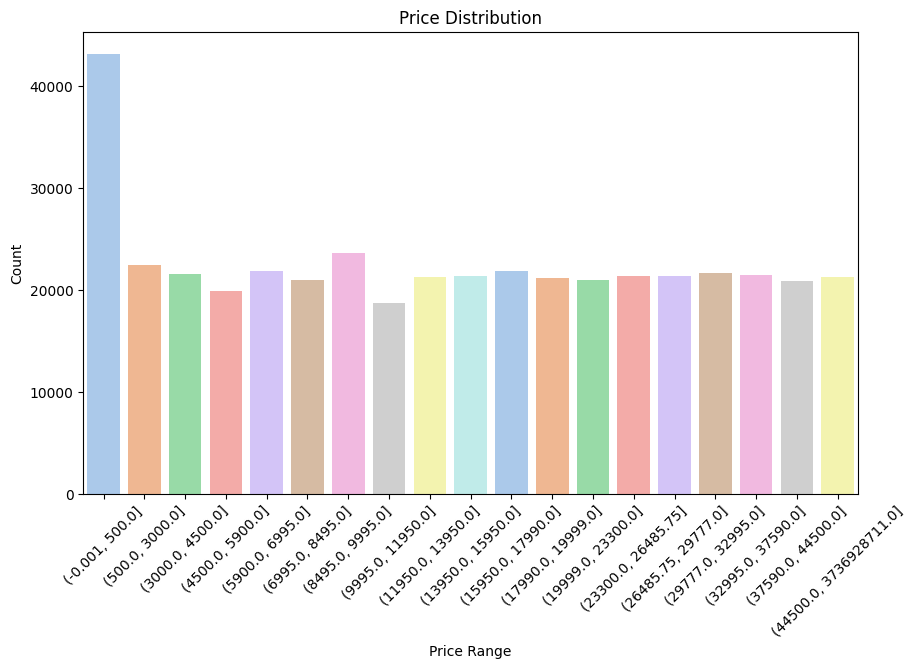

In [146]:
# graph to sort the prices into buckets to see if there are any outliers
# Define the number of bins
num_bins = 20

# Create a new column for price bins using qcut, handling duplicates with 'drop'
data['price_bins'] = pd.qcut(data['price'], q=num_bins, duplicates='drop')

# Create a bar chart for price bins
plt.figure(figsize=(10, 6))
sns.countplot(x='price_bins', data=data, palette='pastel')
plt.title('Price Distribution')
plt.xlabel('Price Range')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

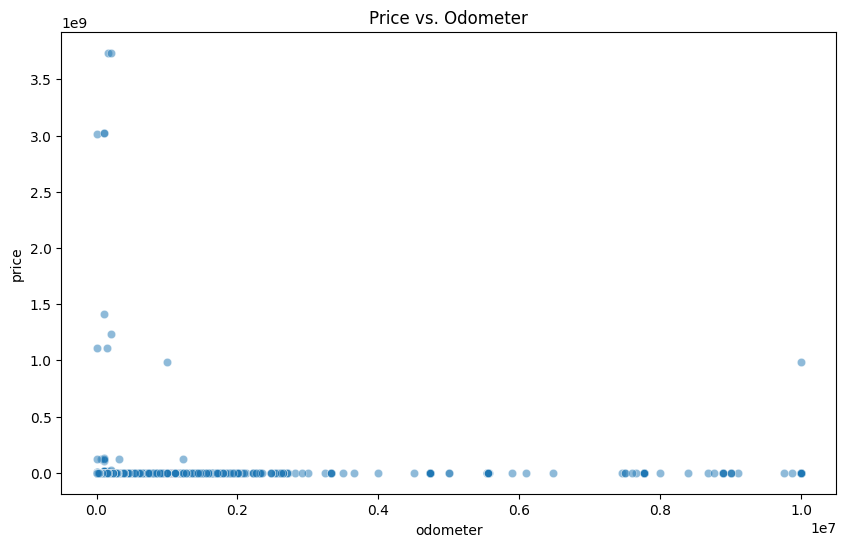

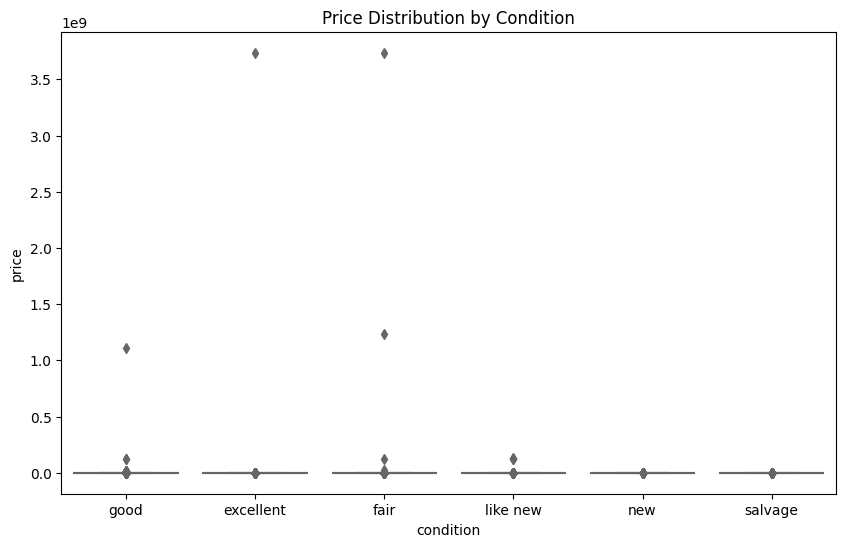

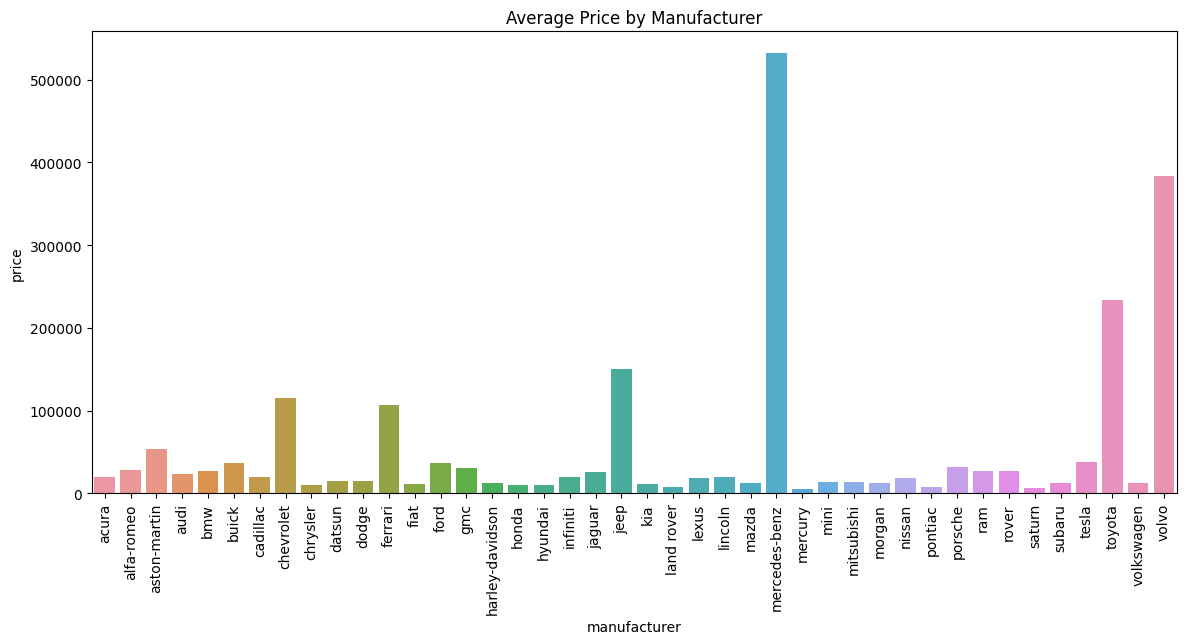

In [147]:
# Some additonal graphs to get an understanding of the data
# Scatter plot for price vs. odometer
plt.figure(figsize=(10, 6))
sns.scatterplot(x='odometer', y='price', data=data, alpha=0.5)
plt.title('Price vs. Odometer')
plt.show()

# Box plot for price distribution across different conditions
plt.figure(figsize=(10, 6))
sns.boxplot(x='condition', y='price', data=data, palette='Set3')
plt.title('Price Distribution by Condition')
plt.show()

# Bar plot for average price by manufacturer
avg_price_by_manufacturer = data.groupby('manufacturer')['price'].mean().reset_index()
plt.figure(figsize=(14, 6))
sns.barplot(x='manufacturer', y='price', data=avg_price_by_manufacturer)
plt.title('Average Price by Manufacturer')
plt.xticks(rotation=90)
plt.show()

### Data Preparation

After our initial exploration and fine tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`. 

There appear to be a lot of duplicates in the dataset which is clear when grouped by VIN. Some of the values in a group are unique only when region/state are included. Let us make a decision to remove the duplicates by VIN/state/region.
Also, size seems to be a correlated column to type. Let us drop that as well.

In [148]:
#dropping unwanted columns
data = data.drop(columns=['id','region','model','size','state'])

#get duplicates by VIN and drop them. Let us also define a new dataframe data_cleaned to use
data_cleaned = data.drop_duplicates(subset=['VIN'])
data_cleaned = data_cleaned.reset_index(drop=True)

#drop the VIN column after using it
data_cleaned = data_cleaned.drop(columns=['VIN'])

We will drop missing values for manufactuere and year as they cannot be easily imputed and filled. We will also convert the cylinders column to numerical. There are also missing values for cylinder which could be for cars that are electric so we will set this to zero for now.

In [149]:
#Drop NA values for columns
data_cleaned = data_cleaned.dropna(subset=['manufacturer'])
data_cleaned = data_cleaned.dropna(subset=['year'])

In [150]:
#Clean the cylinder column values
data_cleaned.loc[data_cleaned['fuel'] == 'electric', 'cylinders'] = 0
data_cleaned['cylinders'] = data_cleaned['cylinders'].str.replace(' cylinders', '')
data_cleaned['cylinders'] = data_cleaned['cylinders'].str.replace(' ', '')
data_cleaned['cylinders'] = data_cleaned['cylinders'].replace('other', np.NaN)

In [151]:
#Clean the data further by removing outliers for price, year and odometer values

data_cleaned = data_cleaned[(data_cleaned['price'] >= 500) & (data_cleaned['price'] <= 100000)].reset_index(drop=True)

columns_to_process = ['year', 'odometer']

# Function to remove top 5% and bottom 5% outliers
def remove_outliers(df, column):
    lower_quantile = df[column].quantile(0.01)
    upper_quantile = df[column].quantile(0.99)
    mask = (df[column] >= lower_quantile) & (df[column] <= upper_quantile)
    return df[mask]

# Remove outliers from the specified columns
for col in columns_to_process:
    data_cleaned = remove_outliers(data_cleaned, col)

In [152]:
#fill nan with mean and mode values depending on column
for col in ['condition', 'cylinders', 'fuel', 'title_status', 'transmission', 'drive', 'type','paint_color']:
    data_cleaned[col].fillna(data_cleaned[col].mode()[0], inplace=True)
data_cleaned['odometer'].fillna(data_cleaned['odometer'].mean(), inplace=True)

In [153]:
nan_counts = data_cleaned.isna().sum()
print(nan_counts)

price           0
year            0
manufacturer    0
condition       0
cylinders       0
fuel            0
odometer        0
title_status    0
transmission    0
drive           0
type            0
paint_color     0
price_bins      0
dtype: int64


We now do not have any missing values in the dataset. The size of the dataset has gotten smaller as well as we removed duplicates. Most of these columns are categorical values, so we will try to convert them to numeric values using encoders. We will use ordinal encoder for condition, title_status, drive and type as they have values that can be ordered.
For other columns we will use a label encoder. We will also scale features such as odometer and cylinders

In [154]:

# Preprocessing

ordinal_features = ['condition', 'title_status', 'drive', 'type']
label_features = ['manufacturer', 'fuel', 'paint_color']
scaling_features = ['odometer', 'cylinders']

condition_categories = ['salvage','fair','good','excellent','like new','new']
title_status_categories = ['missing', 'parts only', 'salvage', 'rebuilt', 'lien', 'clean']
drive_categories = ['fwd', 'rwd', '4wd']
type_categories = ['sedan', 'SUV', 'truck', 'pickup', 'coupe', 'hatchback', 'van', 'convertible', 'wagon', 'mini-van', 'offroad', 'bus', 'other']

ordinal_transformer = Pipeline(steps=[
    ('ordinal', OrdinalEncoder(categories=[condition_categories, title_status_categories, drive_categories, type_categories],
                               handle_unknown='use_encoded_value', unknown_value=-1))
])

label_transformer = Pipeline(steps=[
    ('label', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1))
])

scaling_transformer = Pipeline(steps=[
    ('scale', StandardScaler())
])

preprocessor = ColumnTransformer(transformers=[
    ('ord', ordinal_transformer, ordinal_features),
    ('lbl', label_transformer, label_features),
    ('scale', scaling_transformer, scaling_features)
])

### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

Now that we have declared our preprocessors, let us do the modeling. We will run three different models to see which model yields the best results.

In [155]:
# Models
linear_model = LinearRegression()
ridge_model = Ridge()
lasso_model = Lasso()

# Grid search parameters
ridge_params = {'ridge__alpha': np.logspace(-6, 6, 13)}
lasso_params = {'lasso__alpha': np.logspace(-6, 6, 13)}


# Pipelines
linear_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                  ('linear', linear_model)])

ridge_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                 ('ridge', ridge_model)])

lasso_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                 ('lasso', lasso_model)])

# Grid search
ridge_grid_search = GridSearchCV(ridge_pipeline, ridge_params, scoring='neg_mean_squared_error', cv=5)
lasso_grid_search = GridSearchCV(lasso_pipeline, lasso_params, scoring='neg_mean_squared_error', cv=5)

In [156]:
# Prepare the data for training
X = data_cleaned.drop('price', axis=1)
y = data_cleaned['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the models
linear_pipeline.fit(X_train, y_train)
ridge_grid_search.fit(X_train, y_train)
lasso_grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('ord',
                                                                         Pipeline(steps=[('ordinal',
                                                                                          OrdinalEncoder(categories=[['salvage',
                                                                                                                      'fair',
                                                                                                                      'good',
                                                                                                                      'excellent',
                                                                                                                      'like '
                                                                                                                      'new',
                                                                                                                      'new'],
                                                                                                                     ['missing',
                                                                                                                      'parts '
                                                                                                                      'only',
                                                                                                                      'salvage',
                                                                                                                      'rebuilt',
                                                                                                                      'lien',
                                                                                                                      'clean'],
                                                                                                                     ['fwd',
                                                                                                                      'rwd',
                                                                                                                      '4wd'],
                                                                                                                     ['sedan',
                                                                                                                      'SUV',
                                                                                                                      'truck',
                                                                                                                      'pickup',
                                                                                                                      'coupe',
                                                                                                                      'hatchback',
                                                                                                                      'van',
                                                                                                                      'c...
                                                                                          OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                                         unknown_value=-1))]),
                                                                         ['manufacturer',
                                                                          'fuel',
                                                                          'paint_color']),
                                        

In [157]:
# Get best models
best_ridge = ridge_grid_search.best_estimator_
best_lasso = lasso_grid_search.best_estimator_


In [158]:
# Print alphas for the best models
best_ridge_alpha = best_ridge.named_steps['ridge'].alpha
best_lasso_alpha = best_lasso.named_steps['lasso'].alpha

print("Best alpha for Ridge model:", best_ridge_alpha)
print("Best alpha for Lasso model:", best_lasso_alpha)

Best alpha for Ridge model: 10.0
Best alpha for Lasso model: 0.001


In [159]:
# Model predictions
linear_preds = linear_pipeline.predict(X_test)
ridge_preds = best_ridge.predict(X_test)
lasso_preds = best_lasso.predict(X_test)

In [160]:
# Performance metrics
def calculate_metrics(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    
    return mse, mae, rmse, r2

linear_metrics = calculate_metrics(y_test, linear_preds)
ridge_metrics = calculate_metrics(y_test, ridge_preds)
lasso_metrics = calculate_metrics(y_test, lasso_preds)

# Print metrics
print("Linear Regression Metrics (MSE, MAE, RMSE, R2):", linear_metrics)
print("Ridge Regression Metrics (MSE, MAE, RMSE, R2):", ridge_metrics)
print("Lasso Regression Metrics (MSE, MAE, RMSE, R2):", lasso_metrics)

Linear Regression Metrics (MSE, MAE, RMSE, R2): (97402449.49283433, 7084.003263581448, 9869.267930947783, 0.47134685707281143)
Ridge Regression Metrics (MSE, MAE, RMSE, R2): (97402790.99931267, 7083.900187335754, 9869.285232442757, 0.47134500354167286)
Lasso Regression Metrics (MSE, MAE, RMSE, R2): (97402449.89373128, 7084.003055630793, 9869.267951258153, 0.47134685489693773)


In [161]:
# Feature names
feature_names = ordinal_features + label_features + scaling_features

def print_coefficients(coefs, model_name):
    print(f"{model_name} Coefficients:")
    coef_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefs})
    coef_df = coef_df.sort_values(by='Coefficient', ascending=False, key=lambda x: np.abs(x))
    print(coef_df)
    print("\nMost Important Features:")
    print(coef_df.iloc[:3])

# Print coefficients and feature importance
linear_coefs = linear_pipeline.named_steps['linear'].coef_
ridge_coefs = best_ridge.named_steps['ridge'].coef_
lasso_coefs = best_lasso.named_steps['lasso'].coef_

print_coefficients(linear_coefs, 'Linear Regression')
print_coefficients(ridge_coefs, 'Ridge Regression')
print_coefficients(lasso_coefs, 'Lasso Regression')

Linear Regression Coefficients:
        Feature  Coefficient
7      odometer -7696.788709
2         drive  3413.389365
8     cylinders  3059.575762
5          fuel -3041.276135
1  title_status  2559.511014
0     condition   553.201314
3          type   191.571947
6   paint_color   -35.406828
4  manufacturer     1.623150

Most Important Features:
     Feature  Coefficient
7   odometer -7696.788709
2      drive  3413.389365
8  cylinders  3059.575762
Ridge Regression Coefficients:
        Feature  Coefficient
7      odometer -7695.656454
2         drive  3413.022048
8     cylinders  3059.268980
5          fuel -3040.271968
1  title_status  2556.377525
0     condition   553.131169
3          type   191.583162
6   paint_color   -35.390042
4  manufacturer     1.616444

Most Important Features:
     Feature  Coefficient
7   odometer -7695.656454
2      drive  3413.022048
8  cylinders  3059.268980
Lasso Regression Coefficients:
        Feature  Coefficient
7      odometer -7696.787400
2       

### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight on drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

An alpha value of 10 for Ridge regression indicates that the model requires a moderate amount of regularization, but on the contrary the Lasso model showed only a small amount of regularization is needed. Ridge uses an L2 penalty term but Lasso uses an L1 penalty term. However, interestingly, all models show very similar values for MSE, RMSE, MAE and R2.

A good evaluation metric for the cars dataset might be the MAE because the squared values will amplify error on both the negative and positive side of the price. 

Below, we plot a graph comparing MSE, RMSE, MAE and R2 for all threee models.

<Figure size 1600x800 with 0 Axes>

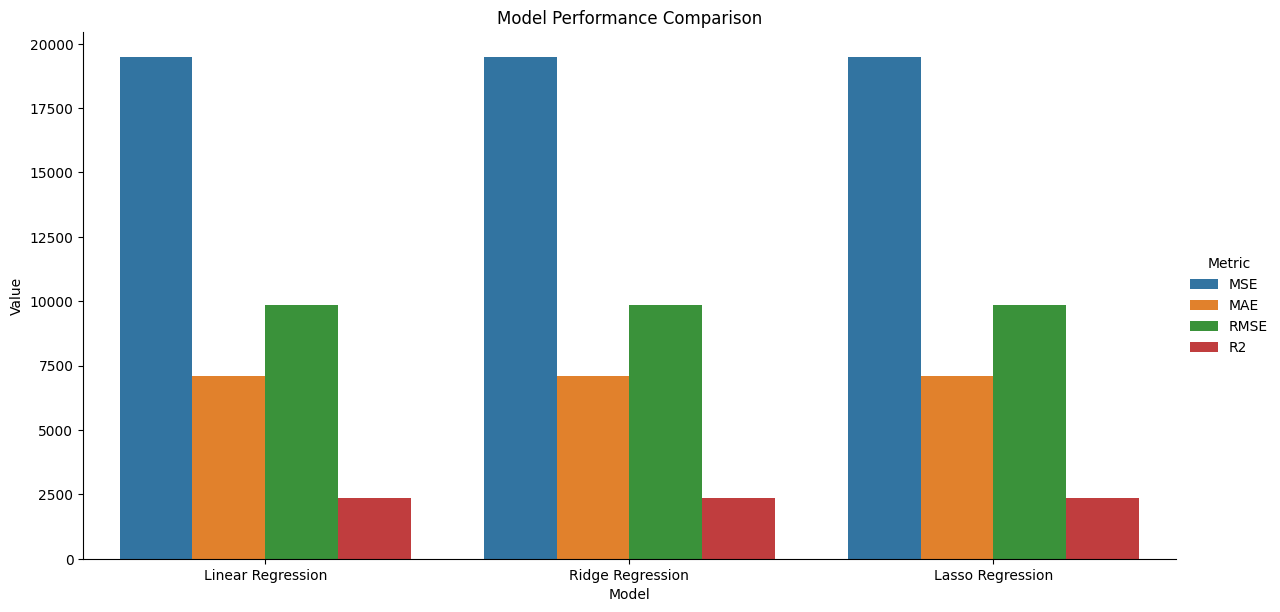

In [162]:
# Data for performance comparison
mse_performance = pd.DataFrame({
    'Model': ['Linear Regression', 'Ridge Regression', 'Lasso Regression'],
    'Metric': 'MSE',
    'Value': [linear_metrics[0], ridge_metrics[0], lasso_metrics[0]]
})

mae_performance = pd.DataFrame({
    'Model': ['Linear Regression', 'Ridge Regression', 'Lasso Regression'],
    'Metric': 'MAE',
    'Value': [linear_metrics[1], ridge_metrics[1], lasso_metrics[1]]
})

rmse_performance = pd.DataFrame({
    'Model': ['Linear Regression', 'Ridge Regression', 'Lasso Regression'],
    'Metric': 'RMSE',
    'Value': [linear_metrics[2], ridge_metrics[2], lasso_metrics[2]]
})

r2_performance = pd.DataFrame({
    'Model': ['Linear Regression', 'Ridge Regression', 'Lasso Regression'],
    'Metric': 'R2',
    'Value': [linear_metrics[3], ridge_metrics[3], lasso_metrics[3]]
})

performance = pd.concat([mse_performance, mae_performance, rmse_performance, r2_performance])

# Scaling factor for MSE
mse_scaling_factor = 5000
r2_scaling_factor = 1000

# Update MSE values
performance.loc[performance['Metric'] == 'MSE', 'Value'] /= mse_scaling_factor
performance.loc[performance['Metric'] == 'R2', 'Value'] *= mse_scaling_factor

# Create a combined bar plot
plt.figure(figsize=(16, 8))
sns.catplot(x='Model', y='Value', hue='Metric', data=performance, kind='bar', height=6, aspect=2)
plt.title('Model Performance Comparison')
plt.show()

The feature importance analysis revealed that the three most influential factors affecting the price of a vehicle are odometer reading, drive type, and the number of cylinders. Drive type and the number of cylinders have a positive correlation with the price, which means that vehicles with more desirable drive types and higher cylinder counts tend to have higher prices. On the other hand, odometer reading has a negative correlation with the price, indicating that as the vehicle's mileage increases, its price generally decreases.

Interestingly, all three models—Linear Regression, Ridge Regression, and Lasso Regression—agree on the top three features contributing to the price prediction. This consistency across models highlights the significance of these features in determining the vehicle's price, regardless of the model's underlying assumptions and regularization techniques.

In summary, the analysis indicates that the vehicle's odometer reading, drive type, and the number of cylinders are the most crucial factors in predicting its price. The consistency of these top features across different models underscores their importance in the price prediction process.

### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine tuning their inventory.


Vehicle Price Prediction Report: A Simple Explanation

We have studied the factors that affect the price of a car using three different methods. The results show which features have the most significant impact on a car's price.

For all three methods, the top three features that greatly influence a car's price are:

Odometer reading: The more miles a car has been driven, the lower its price usually is. This makes sense because a car with higher mileage has likely experienced more wear and tear.

Drive type: The kind of drive system a car has also affects its price. Cars with better drive systems (like four-wheel drive) usually cost more than cars with simpler drive systems (like front-wheel drive).

Number of cylinders: Cars with more cylinders in their engines are typically more expensive. More cylinders often mean better engine performance, which leads to a higher price.

The other factors analyzed in the models, listed in order of importance, are:

Fuel type: The type of fuel a car uses can affect its price. For example, cars with diesel engines might have different prices than those with gasoline engines.

Title status: The legal status of a car, such as whether it has a clean title or a salvage title, can also impact its price.

Condition: The overall condition of a car, whether it's like new, excellent, or fair, plays a role in determining its price.

Vehicle type: The category of a car, such as sedan, SUV, or truck, can influence its price.

Paint color: The color of a car's paint can have a small effect on its price.

Manufacturer: The car's brand or manufacturer can also slightly influence its price.

While these factors do have an impact on the price, they are less important than the top three features.

All three methods we used agree on the most important features, which highlights their importance in determining a car's price.

In summary, our study shows that the odometer reading, drive type, and the number of cylinders are the main factors that influence a car's price. Knowing these factors, along with the other features, can help people make better decisions when buying a car and help sellers set the right price for their cars.